<h1> FIFA 2018 MAN OF THE MATCH PREDICTION </h1>

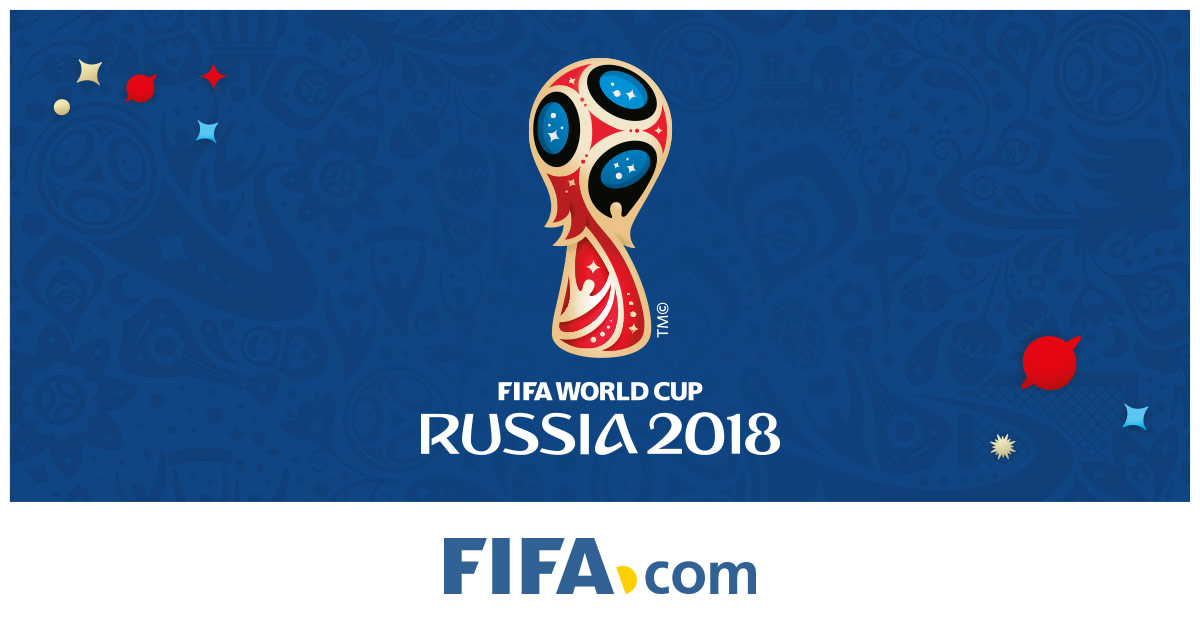

<h2> Exploratory Data Analysis </h2>

In [1]:
#loading Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
data=pd.read_csv("FIFA 2018 Statistics.csv")

data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [3]:
print(data.shape)

(128, 27)


In [4]:
print(data.columns)

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')


In [6]:
data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


Text(0.5,1,'Total goal attempts by teams')

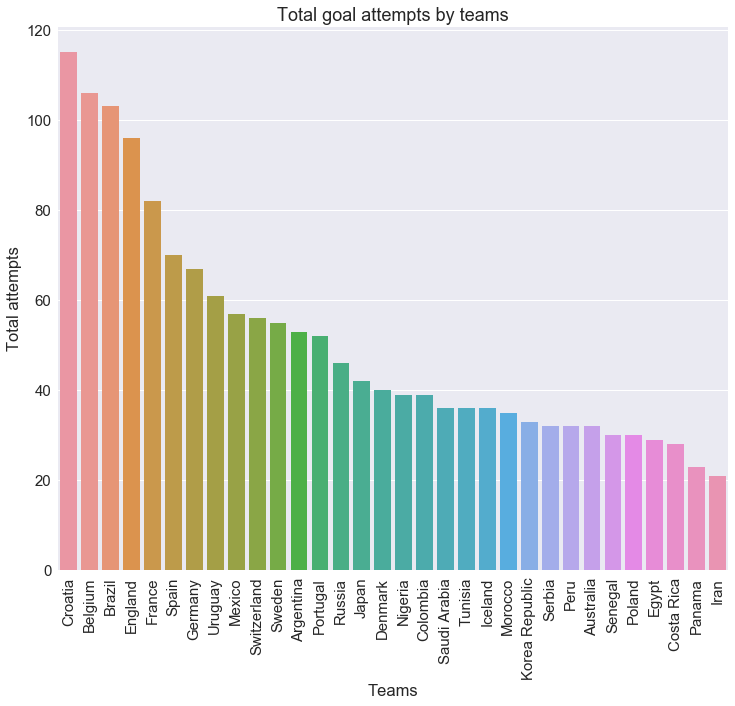

In [7]:
# Plotting total goal attempts by teams
attempts=data.groupby('Team')['Attempts'].sum().reset_index().sort_values(by=('Attempts'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Attempts", data=attempts)

plot1.set_xticklabels(attempts['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total attempts')
plot1.set_title('Total goal attempts by teams')

Text(0.5,1,'Total goals scored by teams')

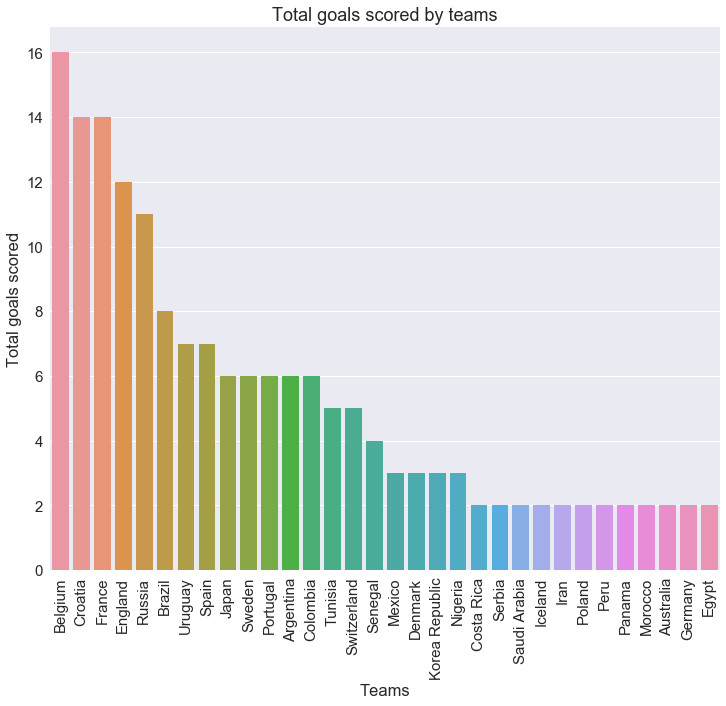

In [8]:
# Plotting total goals by teams
goals_by_team=data.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Goal Scored", data=goals_by_team)

plot1.set_xticklabels(goals_by_team['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals scored')
plot1.set_title('Total goals scored by teams')

Text(0.5,1,'Mean ball possession')

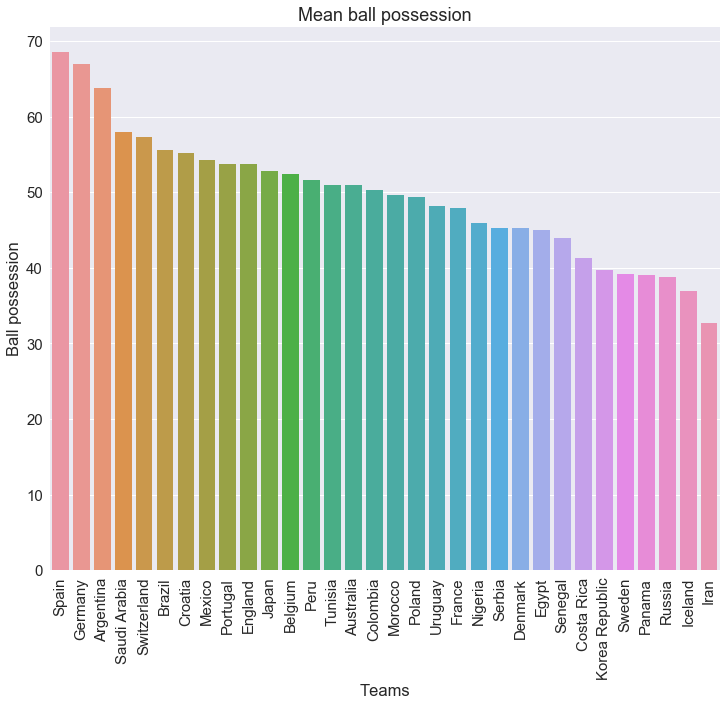

In [9]:
# Plotting mean ball possession for teams

ball_possession=data.groupby('Team')['Ball Possession %'].mean().reset_index().sort_values(by=('Ball Possession %'),ascending=False)
ball_possession 

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Ball Possession %", data=ball_possession)

plot1.set_xticklabels(ball_possession['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Ball possession')
plot1.set_title('Mean ball possession')

Text(0.5,1,'Most Man of the Match awards')

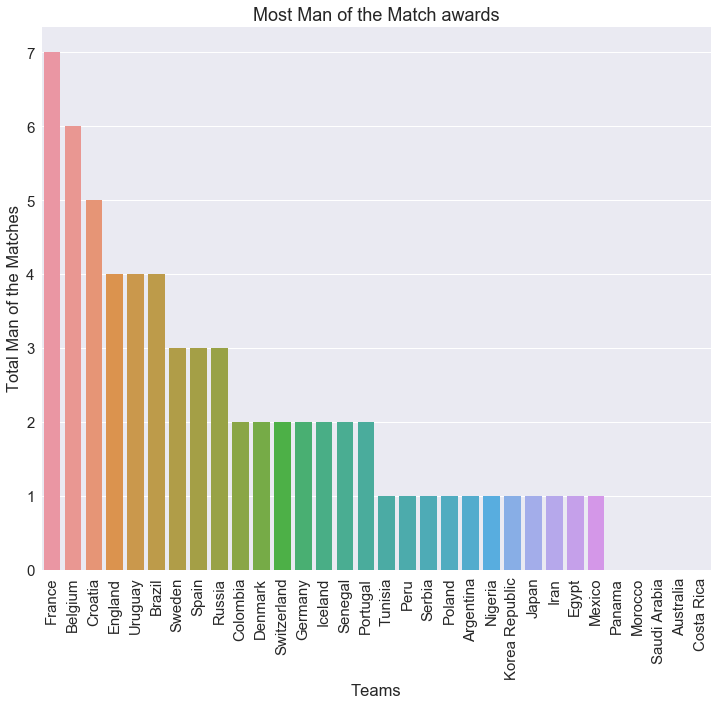

In [10]:
# Plotting total Man of the Match awards for teams

# Encoding the values for the column man of the Match
mom_1={'Man of the Match':{'Yes':1,'No':0}}
data.replace(mom_1,inplace=True)

# Converting column datatype to int
data['Man of the Match']=data['Man of the Match'].astype(int)

mom=data.groupby('Team')['Man of the Match'].sum().reset_index().sort_values(by=('Man of the Match'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Man of the Match", data=mom)

plot1.set_xticklabels(mom['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')

Text(0.5,1,'Total On-Target, Off-Target and Blocked attempts by teams')

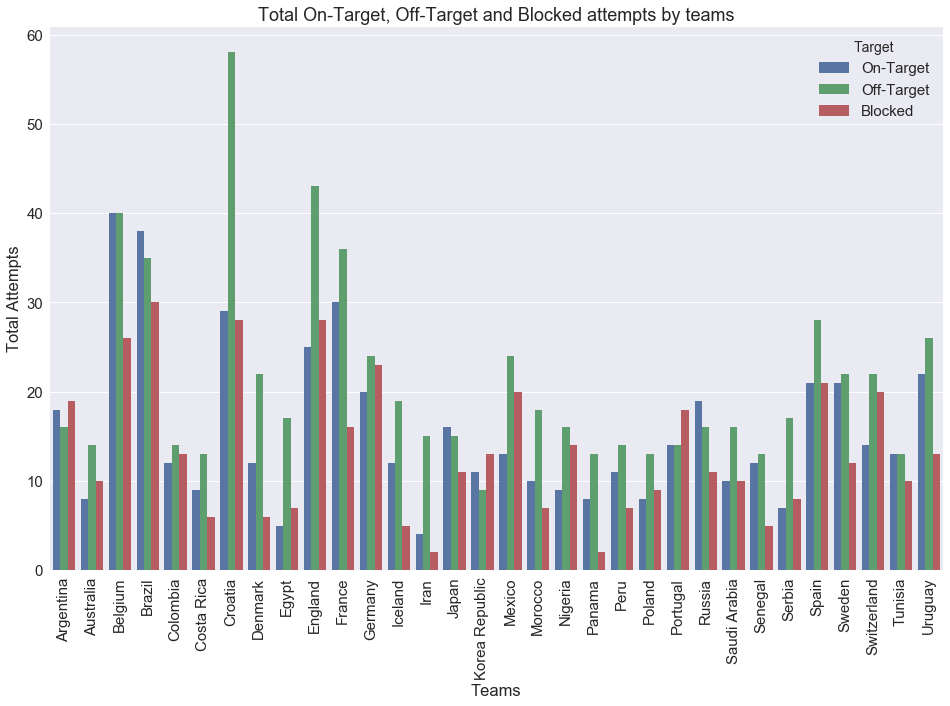

In [11]:
# Plot of Total On-target and Off-target and blocked attempts by teams

group_attempt = data.groupby('Team')['On-Target','Off-Target','Blocked'].sum().reset_index()

# Changing the dataframe for plotting
group_attempt_sorted = group_attempt.melt('Team', var_name='Target', value_name='Value')

# Plotting the new dataset created above
plt.figure(figsize = (16, 10), facecolor = None)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=group_attempt_sorted)

plot1.set_xticklabels(group_attempt_sorted['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Attempts')
plot1.set_title('Total On-Target, Off-Target and Blocked attempts by teams')

Text(0.5,1,'Most Saves')

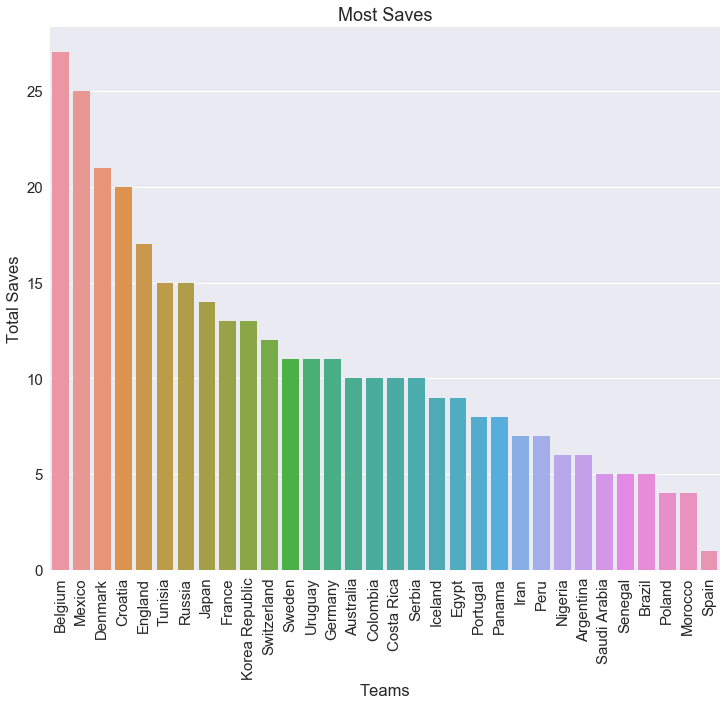

In [12]:
# Plotting Most saves by teams

saves=data.groupby('Team')['Saves'].sum().reset_index().sort_values(by=('Saves'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="Team", y="Saves", data=saves)

plot1.set_xticklabels(saves['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Saves')
plot1.set_title('Most Saves')

Text(0.5,1,'Own goals against themselves')

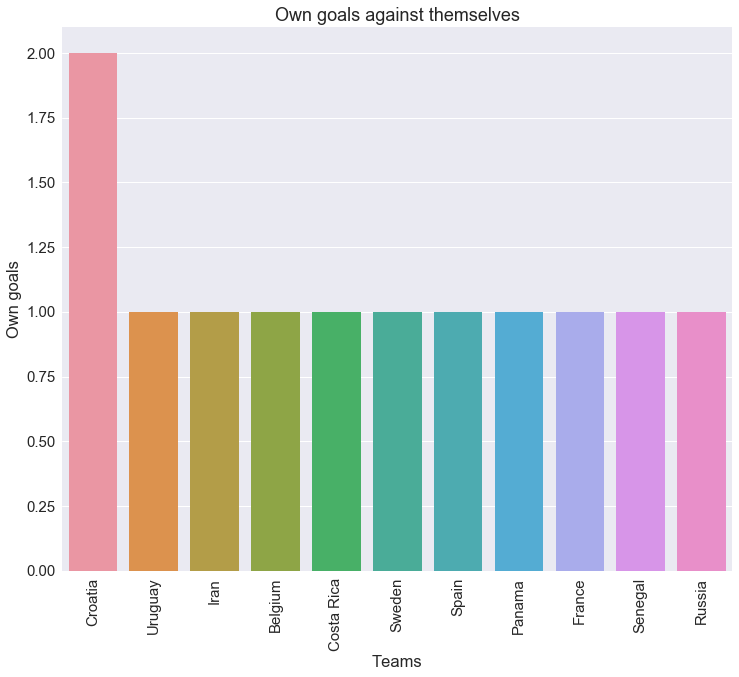

In [13]:
# Plotting Teams who did Own goals against themselves

own_goal=data.groupby('Opponent')['Own goals'].sum().reset_index().sort_values(by=('Own goals'),ascending=False)
own_goal=own_goal[own_goal['Own goals']!=0]

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="Opponent", y="Own goals", data=own_goal)

plot1.set_xticklabels(own_goal['Opponent'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Own goals')
plot1.set_title('Own goals against themselves')

Text(0.5,1,'Total Corners, free kicks and offsides for teams')

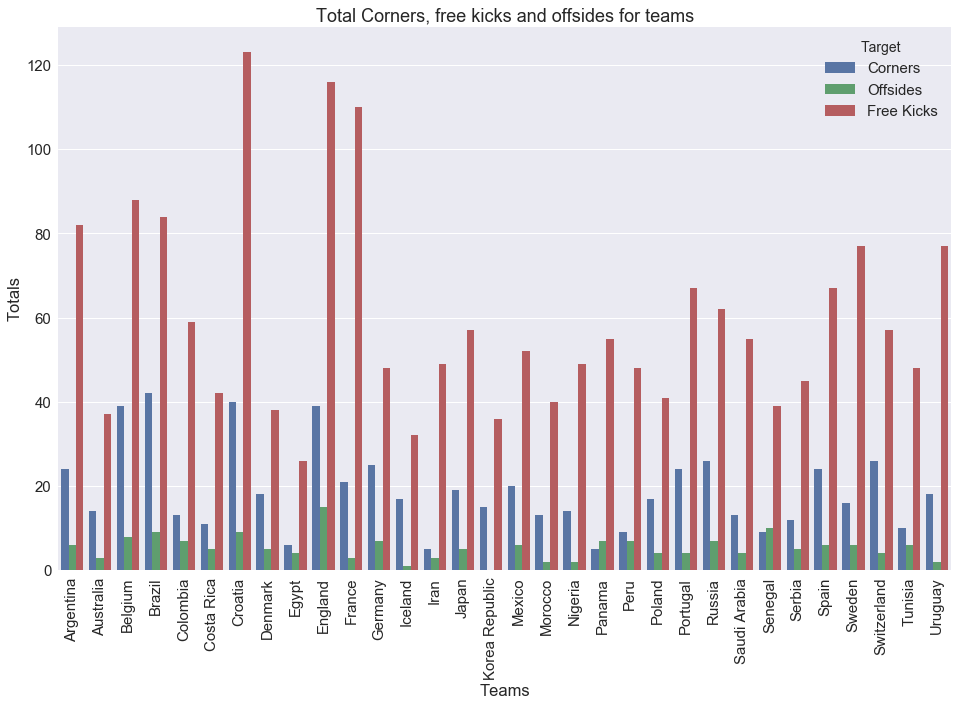

In [14]:
# Plot of total corners, free kicks and offsides for teams

corners_offsides_freekicks = data.groupby('Team')['Corners','Offsides','Free Kicks'].sum().reset_index()
corners_offsides_freekicks

# Changing the dataframe for plotting
corners_offsides_freekicks_sort = corners_offsides_freekicks.melt('Team', var_name='Target', value_name='Value')

# Plotting the new dataset created above
plt.figure(figsize = (16, 10), facecolor = None)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=corners_offsides_freekicks_sort)

plot1.set_xticklabels(corners_offsides_freekicks_sort['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Totals')
plot1.set_title('Total Corners, free kicks and offsides for teams')

Text(0.5,1,'Total goals conceded')

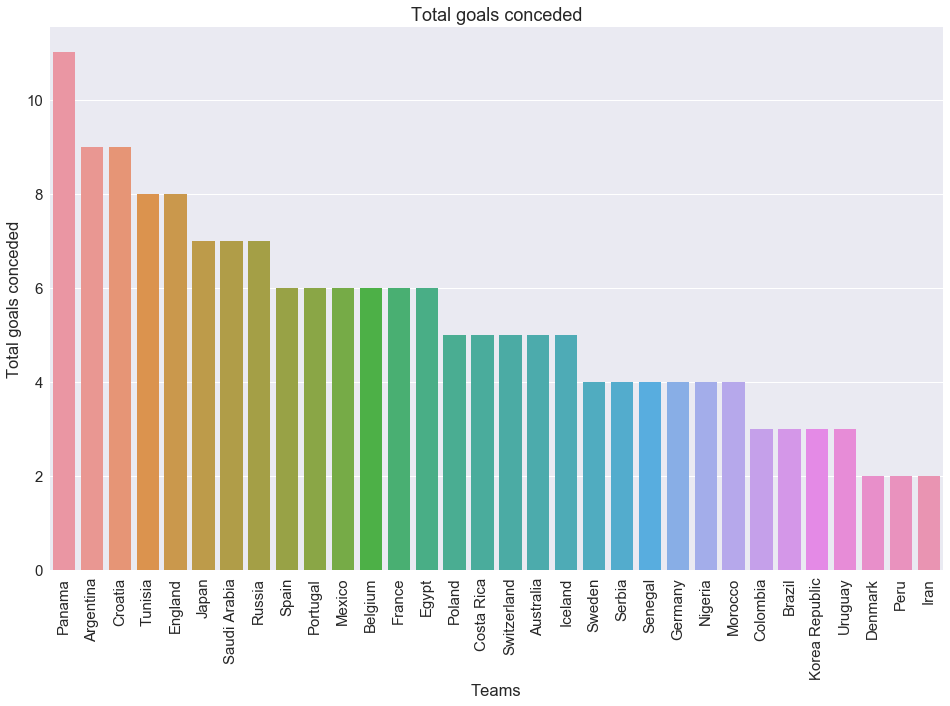

In [15]:
# Plot of total goals conceded by teams

# Most goals conceded by teams
goals_conceded = data.groupby('Opponent')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=False)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Opponent", y="Goal Scored", data=goals_conceded)

plot1.set_xticklabels(goals_conceded['Opponent'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals conceded')
plot1.set_title('Total goals conceded')

Text(0.5,1,'Total yellow cards')

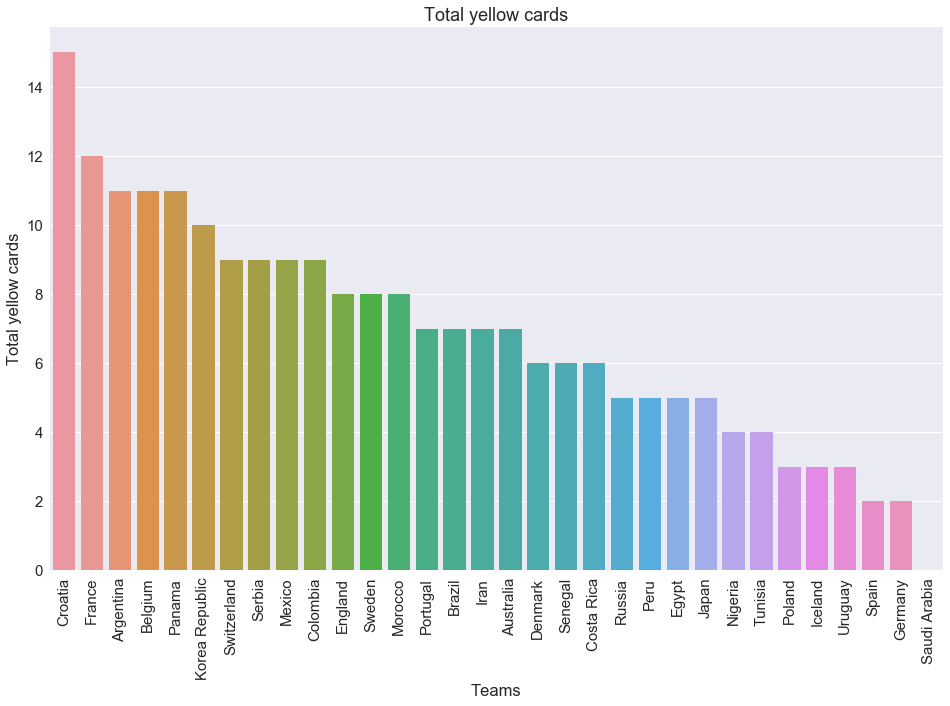

In [16]:
# Plot of total goals conceded by teams

# Most Yellow Cards by teams
yellow_cards = data.groupby('Team')['Yellow Card'].sum().reset_index().sort_values(by=('Yellow Card'), ascending=False)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Yellow Card", data=yellow_cards)

plot1.set_xticklabels(yellow_cards['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total yellow cards')
plot1.set_title('Total yellow cards')

In [18]:
data = pd.concat([data,pd.get_dummies(data['Round'])],axis=1)

In [19]:
mom = pd.get_dummies(data['Man of the Match'],drop_first=True)
df = pd.concat([data,mom, pd.get_dummies(data['Round'])],axis=1)

<h4> Importing Libraries </h4>

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

<h4> Train & Test Split </h4>

In [21]:
X = data.drop(['Date','Team','Opponent','Round','PSO','Man of the Match','1st Goal','Own goals','Own goal Time'],axis=1)
y = data['Man of the Match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<h2> Logistic Regression Model </h2>

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = lr.predict(X_test)

In [25]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.75      0.73        20
          1       0.72      0.68      0.70        19

avg / total       0.72      0.72      0.72        39

